In [2]:
import requests
import os
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [4]:
isbn = 9791158392239

In [5]:
r: requests.Response = requests.get(
        "https://openapi.naver.com/v1/search/book_adv.xml",
        headers={
            (client_id := "X-Naver-Client-Id"): os.environ[client_id],
            (client_secret := "X-Naver-Client-Secret"): os.environ[client_secret],
        },
        params={"d_isbn": isbn},
    )

In [6]:
r

<Response [200]>

In [7]:
dir(r)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [8]:
r.content

b'<?xml version="1.0" encoding="UTF-8"?><rss version="2.0"><channel><title>Naver Open API - book_adv ::\'\'</title><link>https://search.naver.com</link><description>Naver Search Result</description><lastBuildDate>Wed, 02 Jun 2021 05:36:49 +0900</lastBuildDate><total>1</total><start>1</start><display>1</display><item><title>\xeb\xaa\xa8\xeb\x8d\x98 \xec\x9e\x90\xeb\xb0\x94\xec\x8a\xa4\xed\x81\xac\xeb\xa6\xbd\xed\x8a\xb8 Deep Dive (\xec\x9e\x90\xeb\xb0\x94\xec\x8a\xa4\xed\x81\xac\xeb\xa6\xbd\xed\x8a\xb8\xec\x9d\x98 \xea\xb8\xb0\xeb\xb3\xb8 \xea\xb0\x9c\xeb\x85\x90\xea\xb3\xbc \xeb\x8f\x99\xec\x9e\x91 \xec\x9b\x90\xeb\xa6\xac)</title><link>http://book.naver.com/bookdb/book_detail.php?bid=16710547</link><image>https://bookthumb-phinf.pstatic.net/cover/167/105/16710547.jpg?type=m1&amp;udate=20210104</image><author>\xec\x9d\xb4\xec\x9b\x85\xeb\xaa\xa8</author><price>45000</price><discount>40500</discount><publisher>\xec\x9c\x84\xed\x82\xa4\xeb\xb6\x81\xec\x8a\xa4</publisher><pubdate>20200925

In [9]:
import xml.etree.ElementTree as elemTree

In [10]:
r.text

'<?xml version="1.0" encoding="UTF-8"?><rss version="2.0"><channel><title>Naver Open API - book_adv ::\'\'</title><link>https://search.naver.com</link><description>Naver Search Result</description><lastBuildDate>Wed, 02 Jun 2021 05:36:49 +0900</lastBuildDate><total>1</total><start>1</start><display>1</display><item><title>모던 자바스크립트 Deep Dive (자바스크립트의 기본 개념과 동작 원리)</title><link>http://book.naver.com/bookdb/book_detail.php?bid=16710547</link><image>https://bookthumb-phinf.pstatic.net/cover/167/105/16710547.jpg?type=m1&amp;udate=20210104</image><author>이웅모</author><price>45000</price><discount>40500</discount><publisher>위키북스</publisher><pubdate>20200925</pubdate><isbn>1158392230 9791158392239</isbn><description>269개의 그림과 원리를 파헤치는 설명으로 ‘자바스크립트의 기본 개념과 동작 원리’를 이해하자!\n웹페이지의 단순한 보조 기능을 처리하기 위한 제한적인 용도로 태어난 자바스크립트는 과도하다고 느껴질 만큼 친절한 프로그래밍 언어입니다. 이러한 자바스크립트의 특징은 편리한 경우도 있지만 내부... </description></item></channel></rss>'

In [11]:
tree = elemTree.fromstring(r.text)

In [12]:
dir(tree)

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'attrib',
 'clear',
 'extend',
 'find',
 'findall',
 'findtext',
 'get',
 'getchildren',
 'getiterator',
 'insert',
 'items',
 'iter',
 'iterfind',
 'itertext',
 'keys',
 'makeelement',
 'remove',
 'set',
 'tag',
 'tail',
 'text']

In [13]:
tree.find('channel/item/title').text

'모던 자바스크립트 Deep Dive (자바스크립트의 기본 개념과 동작 원리)'

In [14]:
import xmltodict

In [15]:
[(elem.tag, elem.text) for elem in list(tree.find('channel/item'))]

[('title', '모던 자바스크립트 Deep Dive (자바스크립트의 기본 개념과 동작 원리)'),
 ('link', 'http://book.naver.com/bookdb/book_detail.php?bid=16710547'),
 ('image',
  'https://bookthumb-phinf.pstatic.net/cover/167/105/16710547.jpg?type=m1&udate=20210104'),
 ('author', '이웅모'),
 ('price', '45000'),
 ('discount', '40500'),
 ('publisher', '위키북스'),
 ('pubdate', '20200925'),
 ('isbn', '1158392230 9791158392239'),
 ('description',
  '269개의 그림과 원리를 파헤치는 설명으로 ‘자바스크립트의 기본 개념과 동작 원리’를 이해하자!\n웹페이지의 단순한 보조 기능을 처리하기 위한 제한적인 용도로 태어난 자바스크립트는 과도하다고 느껴질 만큼 친절한 프로그래밍 언어입니다. 이러한 자바스크립트의 특징은 편리한 경우도 있지만 내부... ')]

In [16]:
new_dict = dict()
for elem in list(tree.find('channel/item')):
    new_dict[elem.tag] = elem.text
new_dict

{'title': '모던 자바스크립트 Deep Dive (자바스크립트의 기본 개념과 동작 원리)',
 'link': 'http://book.naver.com/bookdb/book_detail.php?bid=16710547',
 'image': 'https://bookthumb-phinf.pstatic.net/cover/167/105/16710547.jpg?type=m1&udate=20210104',
 'author': '이웅모',
 'price': '45000',
 'discount': '40500',
 'publisher': '위키북스',
 'pubdate': '20200925',
 'isbn': '1158392230 9791158392239',
 'description': '269개의 그림과 원리를 파헤치는 설명으로 ‘자바스크립트의 기본 개념과 동작 원리’를 이해하자!\n웹페이지의 단순한 보조 기능을 처리하기 위한 제한적인 용도로 태어난 자바스크립트는 과도하다고 느껴질 만큼 친절한 프로그래밍 언어입니다. 이러한 자바스크립트의 특징은 편리한 경우도 있지만 내부... '}

In [17]:
a = requests.get(new_dict['image'])

In [18]:
from PIL import Image
from io import BytesIO

In [19]:
img = Image.open(BytesIO(a.content))

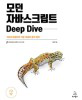

In [20]:
img

In [21]:
img.save("thumb.jpg")

In [23]:
new_dict['isbn'].split(' ')[-1]

'9791158392239'